# Importation de ficheier csv autoscout24_details.csv 

In [534]:
import pandas as pd

data_fraame = pd.read_csv('autoscout24_details.csv')
data_fraame

,URL,Marque,Modèle,Prix,Carrosserie,Etat,Sieges,Portes,Annonce ID,Garantie,...,Annee,Puissance,Transmission,Cylindree,Carburant,CO2,Couleur originale,Type peinture,Couleur interieur,position_page
0,https://www.autoscout24.fr/offres/volkswagen-t...,Volkswagen Touareg,NaN,"€ 4 990,-",Break,Occasion,5.0,5.0,WVGZZZ7LZ4D065769,3 mois,...,03/2004,128 kW (174 CH),Boîte manuelle,NaN,Diesel,265 g/km (mixte),NOIR,NaN,NaN,1
1,https://www.autoscout24.fr/offres/peugeot-308-...,Peugeot 308,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,"€ 6 990,-",Citadine,Occasion,5.0,5.0,NaN,NaN,...,04/2018,81 kW (110 CH),Boîte manuelle,NaN,Essence,0 g/km (mixte),Bleu,NaN,NaN,2
2,https://www.autoscout24.fr/offres/mercedes-ben...,Mercedes-Benz ML 250,250 BLUETEC SPORT 7G-TRONIC +,"€ 17 900,-",SUV/4x4/Pick-Up,Occasion,5.0,5.0,12362,12 mois,...,02/2014,152 kW (207 CH),Boîte automatique,2 143 cm³,Diesel,159 g/km (mixte),NOIR,Métallisé,Noir,3
3,https://www.autoscout24.fr/offres/opel-corsa-c...,Opel Corsa,Corsa 1.4 90 ch Edition,"€ 5 990,-",Berline,Occasion,5.0,5.0,NaN,NaN,...,05/2015,66 kW (90 CH),Avant,NaN,Essence,NaN,Gris,Métallisé,Noir,4
4,https://www.autoscout24.fr/offres/renault-clio...,Renault Clio,1.5 DCI - 8V TURBO,"€ 4 990,-",Autres,Occasion,2.0,5.0,NaN,12 mois,...,05/2015,49 kW (67 CH),Boîte manuelle,NaN,Diesel,83 g/km (mixte),Blanc,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,https://www.autoscout24.fr/offres/land-rover-r...,Land Rover Range Rover Velar,LAND 3.0 D300 4WD PREMIERE EDITION R-DYNAMIC AUTO,"€ 29 680,-",SUV/4x4/Pick-Up,Occasion,5.0,5.0,NaN,NaN,...,10/2017,221 kW (300 CH),Boîte automatique,NaN,Diesel,0 g/km (mixte),Noir,NaN,NaN,24
539,https://www.autoscout24.fr/offres/peugeot-208-...,Peugeot 208,GT,"€ 16 490,-",Autres,Occasion,5.0,5.0,VR3UPHNSSNT033794,3 mois,...,05/2022,96 kW (131 CH),Boîte automatique,NaN,Essence,101 g/km (mixte),GRIS,NaN,NaN,25
540,https://www.autoscout24.fr/offres/peugeot-208-...,Peugeot 208,GT,"€ 16 490,-",Autres,Occasion,5.0,5.0,VR3UPHNSSNT033794,3 mois,...,05/2022,96 kW (131 CH),Boîte automatique,NaN,Essence,101 g/km (mixte),GRIS,NaN,NaN,26
541,https://www.autoscout24.fr/offres/peugeot-308-...,Peugeot 308,"308, 1,2 e-THP, 110 CH, SENSATION","€ 5 700,-",Berline,Occasion,5.0,5.0,NaN,NaN,...,02/2015,81 kW (110 CH),Boîte manuelle,NaN,Essence,0 g/km (mixte),Marron,NaN,NaN,27


# Traitment de donnees

In [535]:
data_fraame['URL'].nunique()

367

### L'identifiant actuel est l'URL de chaque voiture. Chaque voiture possède sa propre URL unique, et avec cette commande, on remarque qu'il y a beaucoup de doublons. Il faut donc les supprimer.

In [536]:
data_fraame = data_fraame.drop_duplicates(subset='URL', keep='first')
data_fraame.shape

(367, 21)

In [537]:
data_fraame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 541
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   URL                367 non-null    object 
 1   Marque             367 non-null    object 
 2   Modèle             362 non-null    object 
 3   Prix               367 non-null    object 
 4   Carrosserie        367 non-null    object 
 5   Etat               367 non-null    object 
 6   Sieges             315 non-null    float64
 7   Portes             340 non-null    float64
 8   Annonce ID         151 non-null    object 
 9   Garantie           157 non-null    object 
 10  Kilometrage        367 non-null    object 
 11  Annee              367 non-null    object 
 12  Puissance          353 non-null    object 
 13  Transmission       363 non-null    object 
 14  Cylindree          108 non-null    object 
 15  Carburant          354 non-null    object 
 16  CO2                314 non-null

### on supprime les colonnes et les lignes inutile ( url , annonce_id, position_page) 

In [538]:
#on supprime les colonnes url, annonce id  position page .....et cylindree qui sont inutiles
data_fraame = data_fraame.drop(columns=['URL', 'Annonce ID', 'position_page','Couleur interieur','Type peinture','Cylindree' , 'Couleur originale','Etat', 'Carrosserie']) 
# on supprime les lignes qui contiennent des valeurs abérrantes exp vihecule qui depasse 10 portes ou 20 sieges
data_fraame = data_fraame[data_fraame['Sieges'] <= 20]
data_fraame = data_fraame[data_fraame['Portes'] <= 10]

data_fraame.head()

,Marque,Modèle,Prix,Sieges,Portes,Garantie,Kilometrage,Annee,Puissance,Transmission,Carburant,CO2
0,Volkswagen Touareg,NaN,"€ 4 990,-",5.0,5.0,3 mois,199 000 km,03/2004,128 kW (174 CH),Boîte manuelle,Diesel,265 g/km (mixte)
1,Peugeot 308,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,"€ 6 990,-",5.0,5.0,NaN,115 000 km,04/2018,81 kW (110 CH),Boîte manuelle,Essence,0 g/km (mixte)
2,Mercedes-Benz ML 250,250 BLUETEC SPORT 7G-TRONIC +,"€ 17 900,-",5.0,5.0,12 mois,140 480 km,02/2014,152 kW (207 CH),Boîte automatique,Diesel,159 g/km (mixte)
3,Opel Corsa,Corsa 1.4 90 ch Edition,"€ 5 990,-",5.0,5.0,NaN,65 525 km,05/2015,66 kW (90 CH),Avant,Essence,NaN
4,Renault Clio,1.5 DCI - 8V TURBO,"€ 4 990,-",2.0,5.0,12 mois,168 000 km,05/2015,49 kW (67 CH),Boîte manuelle,Diesel,83 g/km (mixte)


### on devise la colonne marque  en 2 colonne 'model1', 'model2'et on changee nom de la colonne model => version

In [539]:
data_fraame[['model1', 'model2']] = data_fraame['Marque'].str.split(' ', n=1, expand=True)

data_fraame = data_fraame.drop(columns=['Marque']) 
data_fraame.rename(columns={'Modèle': 'version'}, inplace=True)
data_fraame.head()


,version,Prix,Sieges,Portes,Garantie,Kilometrage,Annee,Puissance,Transmission,Carburant,CO2,model1,model2
0,NaN,"€ 4 990,-",5.0,5.0,3 mois,199 000 km,03/2004,128 kW (174 CH),Boîte manuelle,Diesel,265 g/km (mixte),Volkswagen,Touareg
1,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,"€ 6 990,-",5.0,5.0,NaN,115 000 km,04/2018,81 kW (110 CH),Boîte manuelle,Essence,0 g/km (mixte),Peugeot,308
2,250 BLUETEC SPORT 7G-TRONIC +,"€ 17 900,-",5.0,5.0,12 mois,140 480 km,02/2014,152 kW (207 CH),Boîte automatique,Diesel,159 g/km (mixte),Mercedes-Benz,ML 250
3,Corsa 1.4 90 ch Edition,"€ 5 990,-",5.0,5.0,NaN,65 525 km,05/2015,66 kW (90 CH),Avant,Essence,NaN,Opel,Corsa
4,1.5 DCI - 8V TURBO,"€ 4 990,-",2.0,5.0,12 mois,168 000 km,05/2015,49 kW (67 CH),Boîte manuelle,Diesel,83 g/km (mixte),Renault,Clio


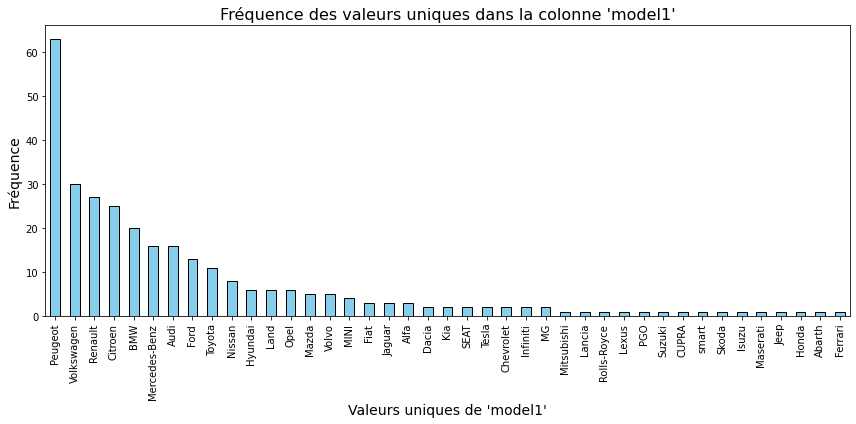

In [540]:
import matplotlib.pyplot as plt

# Compter les occurrences de chaque valeur unique dans la colonne 'model1'
model1_counts = data_fraame['model1'].value_counts()

# Créer un graphique en barres
plt.figure(figsize=(12, 6))
model1_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Ajouter des titres et des labels
plt.title("Fréquence des valeurs uniques dans la colonne 'model1'", fontsize=16)
plt.xlabel("Valeurs uniques de 'model1'", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [541]:
data_fraame.isnull().sum()

version           4
Prix              0
Sieges            0
Portes            0
Garantie        167
Kilometrage       0
Annee             0
Puissance         4
Transmission      2
Carburant        11
CO2              34
model1            0
model2            4
dtype: int64

### on verefie les types de donne et on les transforme en int ou bien float , et on applique les differentes modification sur

In [542]:
data_fraame.dtypes

version          object
Prix             object
Sieges          float64
Portes          float64
Garantie         object
Kilometrage      object
Annee            object
Puissance        object
Transmission     object
Carburant        object
CO2              object
model1           object
model2           object
dtype: object

In [543]:
data_fraame['Prix'] = data_fraame['Prix'].str.replace('[€,-]', '', regex=True).str.strip()
data_fraame.rename(columns={'Prix': 'Prix (€)'}, inplace=True)
data_fraame['Prix (€)'] = data_fraame['Prix (€)'].str.replace('\u202f', '').astype(int)

data_fraame.head()

,version,Prix (€),Sieges,Portes,Garantie,Kilometrage,Annee,Puissance,Transmission,Carburant,CO2,model1,model2
0,NaN,4990,5.0,5.0,3 mois,199 000 km,03/2004,128 kW (174 CH),Boîte manuelle,Diesel,265 g/km (mixte),Volkswagen,Touareg
1,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,6990,5.0,5.0,NaN,115 000 km,04/2018,81 kW (110 CH),Boîte manuelle,Essence,0 g/km (mixte),Peugeot,308
2,250 BLUETEC SPORT 7G-TRONIC +,17900,5.0,5.0,12 mois,140 480 km,02/2014,152 kW (207 CH),Boîte automatique,Diesel,159 g/km (mixte),Mercedes-Benz,ML 250
3,Corsa 1.4 90 ch Edition,5990,5.0,5.0,NaN,65 525 km,05/2015,66 kW (90 CH),Avant,Essence,NaN,Opel,Corsa
4,1.5 DCI - 8V TURBO,4990,2.0,5.0,12 mois,168 000 km,05/2015,49 kW (67 CH),Boîte manuelle,Diesel,83 g/km (mixte),Renault,Clio


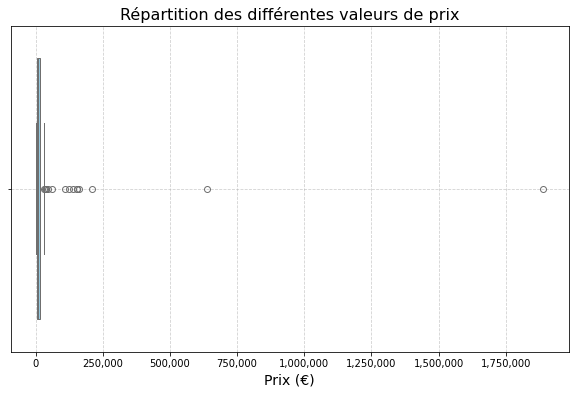

In [544]:
import seaborn as sns

# Créer un graphique en boîte pour afficher les différentes valeurs de prix
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_fraame['Prix (€)'], color='skyblue')

# Ajouter des titres et des labels
plt.title("Répartition des différentes valeurs de prix", fontsize=16)
plt.xlabel("Prix (€)", fontsize=14)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
# Afficher le graphique
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [545]:
data_fraame= data_fraame[data_fraame['Prix (€)'] <= 750000]
data_fraame.head()

,version,Prix (€),Sieges,Portes,Garantie,Kilometrage,Annee,Puissance,Transmission,Carburant,CO2,model1,model2
0,NaN,4990,5.0,5.0,3 mois,199 000 km,03/2004,128 kW (174 CH),Boîte manuelle,Diesel,265 g/km (mixte),Volkswagen,Touareg
1,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,6990,5.0,5.0,NaN,115 000 km,04/2018,81 kW (110 CH),Boîte manuelle,Essence,0 g/km (mixte),Peugeot,308
2,250 BLUETEC SPORT 7G-TRONIC +,17900,5.0,5.0,12 mois,140 480 km,02/2014,152 kW (207 CH),Boîte automatique,Diesel,159 g/km (mixte),Mercedes-Benz,ML 250
3,Corsa 1.4 90 ch Edition,5990,5.0,5.0,NaN,65 525 km,05/2015,66 kW (90 CH),Avant,Essence,NaN,Opel,Corsa
4,1.5 DCI - 8V TURBO,4990,2.0,5.0,12 mois,168 000 km,05/2015,49 kW (67 CH),Boîte manuelle,Diesel,83 g/km (mixte),Renault,Clio


In [546]:
data_fraame['Kilometrage'] = data_fraame['Kilometrage'].astype(str).str.replace(' km', '', regex=False).str.replace('\u202f', '').astype(int)
data_fraame.head()

,version,Prix (€),Sieges,Portes,Garantie,Kilometrage,Annee,Puissance,Transmission,Carburant,CO2,model1,model2
0,NaN,4990,5.0,5.0,3 mois,199000,03/2004,128 kW (174 CH),Boîte manuelle,Diesel,265 g/km (mixte),Volkswagen,Touareg
1,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,6990,5.0,5.0,NaN,115000,04/2018,81 kW (110 CH),Boîte manuelle,Essence,0 g/km (mixte),Peugeot,308
2,250 BLUETEC SPORT 7G-TRONIC +,17900,5.0,5.0,12 mois,140480,02/2014,152 kW (207 CH),Boîte automatique,Diesel,159 g/km (mixte),Mercedes-Benz,ML 250
3,Corsa 1.4 90 ch Edition,5990,5.0,5.0,NaN,65525,05/2015,66 kW (90 CH),Avant,Essence,NaN,Opel,Corsa
4,1.5 DCI - 8V TURBO,4990,2.0,5.0,12 mois,168000,05/2015,49 kW (67 CH),Boîte manuelle,Diesel,83 g/km (mixte),Renault,Clio


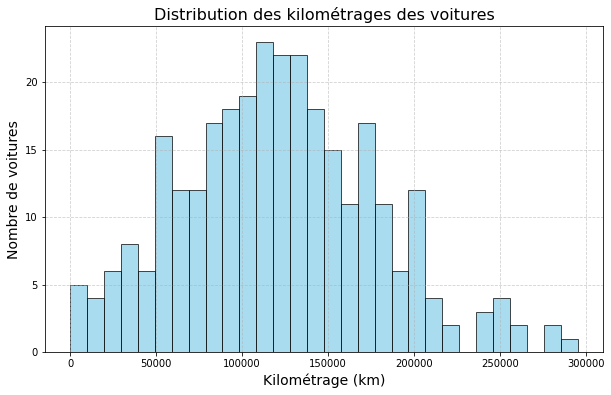

In [547]:
import matplotlib.pyplot as plt

# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer un histogramme pour visualiser la distribution des kilométrages
plt.hist(data_fraame['Kilometrage'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter les titres et labels
plt.title("Distribution des kilométrages des voitures", fontsize=16)
plt.xlabel("Kilométrage (km)", fontsize=14)
plt.ylabel("Nombre de voitures", fontsize=14)

# Ajouter une grille pour faciliter la lecture
plt.grid(True, linestyle='--', alpha=0.6)

# Afficher le graphique
plt.show()


In [548]:
data_fraame['Annee'] = data_fraame['Annee'].str[3:].astype(int)
data_fraame.dtypes

version          object
Prix (€)          int32
Sieges          float64
Portes          float64
Garantie         object
Kilometrage       int32
Annee             int32
Puissance        object
Transmission     object
Carburant        object
CO2              object
model1           object
model2           object
dtype: object

In [549]:
data_fraame['puissance_ch'] = data_fraame['Puissance'].str.extract(r'(\d+)\s*CH').fillna('')
data_fraame['puissance_ch'] = pd.to_numeric(data_fraame['puissance_ch'], errors='coerce')
data_fraame = data_fraame.drop(columns=['Puissance'])
data_fraame.head()

,version,Prix (€),Sieges,Portes,Garantie,Kilometrage,Annee,Transmission,Carburant,CO2,model1,model2,puissance_ch
0,NaN,4990,5.0,5.0,3 mois,199000,2004,Boîte manuelle,Diesel,265 g/km (mixte),Volkswagen,Touareg,174.0
1,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,6990,5.0,5.0,NaN,115000,2018,Boîte manuelle,Essence,0 g/km (mixte),Peugeot,308,110.0
2,250 BLUETEC SPORT 7G-TRONIC +,17900,5.0,5.0,12 mois,140480,2014,Boîte automatique,Diesel,159 g/km (mixte),Mercedes-Benz,ML 250,207.0
3,Corsa 1.4 90 ch Edition,5990,5.0,5.0,NaN,65525,2015,Avant,Essence,NaN,Opel,Corsa,90.0
4,1.5 DCI - 8V TURBO,4990,2.0,5.0,12 mois,168000,2015,Boîte manuelle,Diesel,83 g/km (mixte),Renault,Clio,67.0


In [550]:
# Remplir les lignes où Garantie est "Oui" ou NaN avec "3 mois"
data_fraame.loc[data_fraame['Garantie'].isin(['Oui', None]), 'Garantie'] = '3 mois'

data_fraame['Garantie'].value_counts()


Garantie
12 mois    48
3 mois     42
6 mois     41
24 mois     1
Name: count, dtype: int64

In [551]:
data_fraame['Garantie'] = data_fraame['Garantie'].fillna('0')
data_fraame['Garantie'].unique()


array(['3 mois', '0', '12 mois', '6 mois', '24 mois'], dtype=object)

In [552]:
data_fraame = data_fraame.dropna(subset=['Carburant'])

carburant_mapping = {
    'Super 95': 'Essence',
    'Super E10 95': 'Essence',
    'Super Plus 98': 'Essence'
}
data_fraame['Carburant'] = data_fraame['Carburant'].replace(carburant_mapping)


In [553]:
transmission_mapping = {'NaN':7,
    'Boîte manuelle': 0,
    'Boîte automatique': 1,
    'Avant': 3 ,  'Arrière': 4, '4x4': 5 , 'Semi-automatique': 6}

data_fraame['Transmission']=data_fraame['Transmission'].map(transmission_mapping)
data_fraame['Transmission'] = data_fraame['Transmission'].fillna(7).astype(int)
data_fraame = data_fraame[data_fraame['Transmission'].isin([0, 1])]
data_fraame['Transmission'].value_counts()

Transmission
0    168
1     92
Name: count, dtype: int64

In [554]:
data_fraame['Garantie (mois)'] = data_fraame['Garantie'].str.replace(' mois', '', regex=False).astype(int)
data_fraame = data_fraame.drop(columns=['Garantie'])
# Réorganisation des colonnes du DataFrame
data_fraame = data_fraame[['model1', 
                   'model2', 
                   'version', 
                   'Prix (€)', 
                   'Kilometrage', 
                   'Carburant', 
                   'puissance_ch', 
                   'Garantie (mois)', 
                   'Transmission', 
                   'Sieges', 
                   'Portes', 
                   'CO2', 
                   'Annee']]
data_fraame.head()

,model1,model2,version,Prix (€),Kilometrage,Carburant,puissance_ch,Garantie (mois),Transmission,Sieges,Portes,CO2,Annee
0,Volkswagen,Touareg,NaN,4990,199000,Diesel,174.0,3,0,5.0,5.0,265 g/km (mixte),2004
1,Peugeot,308,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,6990,115000,Essence,110.0,0,0,5.0,5.0,0 g/km (mixte),2018
2,Mercedes-Benz,ML 250,250 BLUETEC SPORT 7G-TRONIC +,17900,140480,Diesel,207.0,12,1,5.0,5.0,159 g/km (mixte),2014
4,Renault,Clio,1.5 DCI - 8V TURBO,4990,168000,Diesel,67.0,12,0,2.0,5.0,83 g/km (mixte),2015
5,Nissan,Pixo,1.0 68CH ACENTA,2990,112241,Essence,NaN,3,0,4.0,5.0,99 g/km (mixte),2010


# Importation de ficheier csv df3.csv de la central

In [555]:
data_frame_central=pd.read_csv('df3.csv')
data_frame_central = data_frame_central[[ 'model1', 'model2', 'version', 'price', 'km', 'fuel',
                                         'HorseP', 'warranty_month', 'Gearbox_auto', 'numbe_seats', 'doors_nb',
                                         'CO2_g_km', 'year']]

data_frame_central

,model1,model2,version,price,km,fuel,HorseP,warranty_month,Gearbox_auto,numbe_seats,doors_nb,CO2_g_km,year
0,HYUNDAI,I20 (3E GENERATION),III 1.0 T-GDI 100 ACTIVE,16340,47981,Essence,100.0,12,0,5.0,5.0,NaN,2018
1,RENAULT,MEGANE 4,IV 1.2 TCE 130 ENERGY INTENS,16110,104063,Essence,132.0,12,0,5.0,5.0,119.0,2016
2,PEUGEOT,2008,(2) 1.6 BLUEHDI 100 S&S ALLURE BUSINESS,17720,108405,Diesel,99.0,12,0,5.0,5.0,90.0,2016
3,PEUGEOT,208 (2E GENERATION),II 1.5 BLUEHDI 100 S&S ALLURE,24550,30223,Diesel,102.0,12,0,5.0,5.0,107.0,2019
4,VOLKSWAGEN,TIGUAN 2,II 2.0 TDI 150 BLUEMOTION TECHNOLOGY CONFORTLI...,35560,39578,Diesel,150.0,12,1,5.0,5.0,123.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141194,TOYOTA,COROLLA 12,XII (2) 122H HYBRIDE DYNAMIC BUSINESS + PROGRA...,30980,27938,Hybride essence électrique,98.0,36,1,5.0,5.0,NaN,2021
141195,ABARTH,500 (2E GENERATION),II (2) 1.4 TURBO 16V T-JET 145 595,21590,11122,Essence,145.0,12,0,4.0,3.0,150.0,2017
141196,BMW,X2 F39,(F39) SDRIVE20I M SPORT X DKG7,41550,59226,Essence,192.0,24,1,5.0,5.0,133.0,2018
141197,MINI,MINI 3 3P,III 2.0 170 COOPER SD BVA,23830,67976,Diesel,170.0,12,1,4.0,3.0,104.0,2016


In [556]:
# Compter le nombre de doublons
nombre_doublons = data_frame_central.duplicated().sum()

# Afficher le résultat
print(f"Nombre de doublons dans le DataFrame : {nombre_doublons}")
# Supprimer les doublons
data_frame_central = data_frame_central.drop_duplicates()


Nombre de doublons dans le DataFrame : 16808


In [557]:
data_frame_central.rename(columns={'price': 'Prix (€)', 'km': 'Kilometrage', 'fuel': 'Carburant' ,'HorseP':'puissance_ch', 'warranty_month':'Garantie (mois)',	'Gearbox_auto':'Transmission', 	'numbe_seats':'Sieges'	,'doors_nb':'Portes' ,	'CO2_g_km':'CO2','year':'Annee'}, inplace=True)
data_frame_central.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_21036\774523526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_central.rename(columns={'price': 'Prix (€)', 'km': 'Kilometrage', 'fuel': 'Carburant' ,'HorseP':'puissance_ch', 'warranty_month':'Garantie (mois)',	'Gearbox_auto':'Transmission', 	'numbe_seats':'Sieges'	,'doors_nb':'Portes' ,	'CO2_g_km':'CO2','year':'Annee'}, inplace=True)


,model1,model2,version,Prix (€),Kilometrage,Carburant,puissance_ch,Garantie (mois),Transmission,Sieges,Portes,CO2,Annee
0,HYUNDAI,I20 (3E GENERATION),III 1.0 T-GDI 100 ACTIVE,16340,47981,Essence,100.0,12,0,5.0,5.0,NaN,2018
1,RENAULT,MEGANE 4,IV 1.2 TCE 130 ENERGY INTENS,16110,104063,Essence,132.0,12,0,5.0,5.0,119.0,2016
2,PEUGEOT,2008,(2) 1.6 BLUEHDI 100 S&S ALLURE BUSINESS,17720,108405,Diesel,99.0,12,0,5.0,5.0,90.0,2016
3,PEUGEOT,208 (2E GENERATION),II 1.5 BLUEHDI 100 S&S ALLURE,24550,30223,Diesel,102.0,12,0,5.0,5.0,107.0,2019
4,VOLKSWAGEN,TIGUAN 2,II 2.0 TDI 150 BLUEMOTION TECHNOLOGY CONFORTLI...,35560,39578,Diesel,150.0,12,1,5.0,5.0,123.0,2019


In [558]:
# Comparaison des colonnes et des types de données
comparison = pd.DataFrame({
    'data_fraame_columns': data_fraame.dtypes.index,
    'data_fraame_dtypes': data_fraame.dtypes.values,
    'data_frame_central_columns': data_frame_central.dtypes.index,
    'data_frame_central_dtypes': data_frame_central.dtypes.values
})

comparison

,data_fraame_columns,data_fraame_dtypes,data_frame_central_columns,data_frame_central_dtypes
0,model1,object,model1,object
1,model2,object,model2,object
2,version,object,version,object
3,Prix (€),int32,Prix (€),int64
4,Kilometrage,int32,Kilometrage,int64
5,Carburant,object,Carburant,object
6,puissance_ch,float64,puissance_ch,float64
7,Garantie (mois),int32,Garantie (mois),int64
8,Transmission,int32,Transmission,int64
9,Sieges,float64,Sieges,float64


In [559]:
# Fusionner les deux DataFrames
df_gen = pd.concat([data_fraame, data_frame_central], ignore_index=True)

# Afficher les premières lignes du DataFrame fusionné
df_gen.shape

(124651, 13)

In [560]:
df_gen = df_gen.dropna()
df_gen.isnull().sum()

model1             0
model2             0
version            0
Prix (€)           0
Kilometrage        0
Carburant          0
puissance_ch       0
Garantie (mois)    0
Transmission       0
Sieges             0
Portes             0
CO2                0
Annee              0
dtype: int64

In [561]:
df_gen

,model1,model2,version,Prix (€),Kilometrage,Carburant,puissance_ch,Garantie (mois),Transmission,Sieges,Portes,CO2,Annee
1,Peugeot,308,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,6990,115000,Essence,110.0,0,0,5.0,5.0,0 g/km (mixte),2018
2,Mercedes-Benz,ML 250,250 BLUETEC SPORT 7G-TRONIC +,17900,140480,Diesel,207.0,12,1,5.0,5.0,159 g/km (mixte),2014
3,Renault,Clio,1.5 DCI - 8V TURBO,4990,168000,Diesel,67.0,12,0,2.0,5.0,83 g/km (mixte),2015
5,Citroen,C3,Citroën 1.2 PURETECH 110CH SHINE BVA,9990,28990,Essence,110.0,0,1,5.0,5.0,0 g/km (mixte),2020
6,Peugeot,208,80CH ACTIVE,4990,106000,Essence,83.0,0,0,5.0,5.0,0 g/km (mixte),2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124644,FORD,FOCUS 4 SW,IV SW 1.5 ECOBLUE 95 S&S TREND BUSINESS,15320,163366,Diesel,95.0,12,0,5.0,5.0,89.0,2017
124646,BMW,Z4 G29,(G29) 3.0 M40IA 23CV FIRST EDITION,60400,59966,Essence,340.0,12,1,2.0,2.0,162.0,2017
124648,ABARTH,500 (2E GENERATION),II (2) 1.4 TURBO 16V T-JET 145 595,21590,11122,Essence,145.0,12,0,4.0,3.0,150.0,2017
124649,MINI,MINI 3 3P,III 2.0 170 COOPER SD BVA,23830,67976,Diesel,170.0,12,1,4.0,3.0,104.0,2016


In [562]:
df_gen = pd.get_dummies(df_gen, columns=['model1'], drop_first=True)

df_gen

,model2,version,Prix (€),Kilometrage,Carburant,puissance_ch,Garantie (mois),Transmission,Sieges,Portes,...,model1_SUZUKI,model1_Suzuki,model1_TESLA,model1_TOYOTA,model1_Toyota,model1_VOLKSWAGEN,model1_VOLVO,model1_Volkswagen,model1_Volvo,model1_smart
1,308,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,6990,115000,Essence,110.0,0,0,5.0,5.0,...,False,False,False,False,False,False,False,False,False,False
2,ML 250,250 BLUETEC SPORT 7G-TRONIC +,17900,140480,Diesel,207.0,12,1,5.0,5.0,...,False,False,False,False,False,False,False,False,False,False
3,Clio,1.5 DCI - 8V TURBO,4990,168000,Diesel,67.0,12,0,2.0,5.0,...,False,False,False,False,False,False,False,False,False,False
5,C3,Citroën 1.2 PURETECH 110CH SHINE BVA,9990,28990,Essence,110.0,0,1,5.0,5.0,...,False,False,False,False,False,False,False,False,False,False
6,208,80CH ACTIVE,4990,106000,Essence,83.0,0,0,5.0,5.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124644,FOCUS 4 SW,IV SW 1.5 ECOBLUE 95 S&S TREND BUSINESS,15320,163366,Diesel,95.0,12,0,5.0,5.0,...,False,False,False,False,False,False,False,False,False,False
124646,Z4 G29,(G29) 3.0 M40IA 23CV FIRST EDITION,60400,59966,Essence,340.0,12,1,2.0,2.0,...,False,False,False,False,False,False,False,False,False,False
124648,500 (2E GENERATION),II (2) 1.4 TURBO 16V T-JET 145 595,21590,11122,Essence,145.0,12,0,4.0,3.0,...,False,False,False,False,False,False,False,False,False,False
124649,MINI 3 3P,III 2.0 170 COOPER SD BVA,23830,67976,Diesel,170.0,12,1,4.0,3.0,...,False,False,False,False,False,False,False,False,False,False


In [563]:
df_gen.shape

(115948, 93)

In [564]:
# Transformer uniquement les colonnes booléennes en entiers (True -> 1, False -> 0)
bool_columns = df_gen.select_dtypes(include=['bool']).columns
df_gen[bool_columns] = df_gen[bool_columns].astype(int)

# Afficher les premières lignes pour vérifier
df_gen.head()


,model2,version,Prix (€),Kilometrage,Carburant,puissance_ch,Garantie (mois),Transmission,Sieges,Portes,...,model1_SUZUKI,model1_Suzuki,model1_TESLA,model1_TOYOTA,model1_Toyota,model1_VOLKSWAGEN,model1_VOLVO,model1_Volkswagen,model1_Volvo,model1_smart
1,308,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,6990,115000,Essence,110.0,0,0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2,ML 250,250 BLUETEC SPORT 7G-TRONIC +,17900,140480,Diesel,207.0,12,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,Clio,1.5 DCI - 8V TURBO,4990,168000,Diesel,67.0,12,0,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0
5,C3,Citroën 1.2 PURETECH 110CH SHINE BVA,9990,28990,Essence,110.0,0,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6,208,80CH ACTIVE,4990,106000,Essence,83.0,0,0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [565]:
# Calculer la moyenne de la variable cible (Prix (€)) pour chaque valeur unique de model2
model2_target_mean = df_gen.groupby('model2')['Prix (€)'].mean()

# Remplacer les valeurs de la colonne model2 par les moyennes correspondantes
df_gen['model2_encoded'] = df_gen['model2'].map(model2_target_mean)

# Supprimer la colonne originale si elle n'est plus nécessaire
df_gen= df_gen.drop(columns=['model2'])

# Afficher les premières lignes pour vérifier
df_gen.head()

,version,Prix (€),Kilometrage,Carburant,puissance_ch,Garantie (mois),Transmission,Sieges,Portes,CO2,...,model1_Suzuki,model1_TESLA,model1_TOYOTA,model1_Toyota,model1_VOLKSWAGEN,model1_VOLVO,model1_Volkswagen,model1_Volvo,model1_smart,model2_encoded
1,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,6990,115000,Essence,110.0,0,0,5.0,5.0,0 g/km (mixte),...,0,0,0,0,0,0,0,0,0,10905.142857
2,250 BLUETEC SPORT 7G-TRONIC +,17900,140480,Diesel,207.0,12,1,5.0,5.0,159 g/km (mixte),...,0,0,0,0,0,0,0,0,0,17900.000000
3,1.5 DCI - 8V TURBO,4990,168000,Diesel,67.0,12,0,2.0,5.0,83 g/km (mixte),...,0,0,0,0,0,0,0,0,0,6020.000000
5,Citroën 1.2 PURETECH 110CH SHINE BVA,9990,28990,Essence,110.0,0,1,5.0,5.0,0 g/km (mixte),...,0,0,0,0,0,0,0,0,0,7555.882353
6,80CH ACTIVE,4990,106000,Essence,83.0,0,0,5.0,5.0,0 g/km (mixte),...,0,0,0,0,0,0,0,0,0,14431.845404


In [566]:
# Extraire uniquement les entiers de la colonne 'CO2'
df_gen['CO2'] = df_gen['CO2'].str.extract('(\d+)').astype(float)

# Afficher les premières lignes pour vérifier
df_gen.head()

,version,Prix (€),Kilometrage,Carburant,puissance_ch,Garantie (mois),Transmission,Sieges,Portes,CO2,...,model1_Suzuki,model1_TESLA,model1_TOYOTA,model1_Toyota,model1_VOLKSWAGEN,model1_VOLVO,model1_Volkswagen,model1_Volvo,model1_smart,model2_encoded
1,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,6990,115000,Essence,110.0,0,0,5.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,10905.142857
2,250 BLUETEC SPORT 7G-TRONIC +,17900,140480,Diesel,207.0,12,1,5.0,5.0,159.0,...,0,0,0,0,0,0,0,0,0,17900.000000
3,1.5 DCI - 8V TURBO,4990,168000,Diesel,67.0,12,0,2.0,5.0,83.0,...,0,0,0,0,0,0,0,0,0,6020.000000
5,Citroën 1.2 PURETECH 110CH SHINE BVA,9990,28990,Essence,110.0,0,1,5.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,7555.882353
6,80CH ACTIVE,4990,106000,Essence,83.0,0,0,5.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,14431.845404


In [567]:
from sklearn.preprocessing import LabelEncoder

# Initialiser le LabelEncoder
label_encoder_carburant = LabelEncoder()
df_gen['Carburant'] = df_gen['Carburant'].map({'Essence': 0, 'Diesel': 1})


# Afficher les premières lignes pour vérifier
df_gen.head()

,version,Prix (€),Kilometrage,Carburant,puissance_ch,Garantie (mois),Transmission,Sieges,Portes,CO2,...,model1_Suzuki,model1_TESLA,model1_TOYOTA,model1_Toyota,model1_VOLKSWAGEN,model1_VOLVO,model1_Volkswagen,model1_Volvo,model1_smart,model2_encoded
1,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,6990,115000,0.0,110.0,0,0,5.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,10905.142857
2,250 BLUETEC SPORT 7G-TRONIC +,17900,140480,1.0,207.0,12,1,5.0,5.0,159.0,...,0,0,0,0,0,0,0,0,0,17900.000000
3,1.5 DCI - 8V TURBO,4990,168000,1.0,67.0,12,0,2.0,5.0,83.0,...,0,0,0,0,0,0,0,0,0,6020.000000
5,Citroën 1.2 PURETECH 110CH SHINE BVA,9990,28990,0.0,110.0,0,1,5.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,7555.882353
6,80CH ACTIVE,4990,106000,0.0,83.0,0,0,5.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,14431.845404


In [578]:
# Supprimer la colonne 'CO2'
df_gen = df_gen.drop(columns=['CO2'])

# Supprimer les lignes où la colonne 'Carburant' contient des valeurs vides
df_gen = df_gen.dropna(subset=['Carburant'])

# Afficher les premières lignes pour vérifier
df_gen.head()

,version,Prix (€),Kilometrage,Carburant,puissance_ch,Garantie (mois),Transmission,Sieges,Portes,Annee,...,model1_Suzuki,model1_TESLA,model1_TOYOTA,model1_Toyota,model1_VOLKSWAGEN,model1_VOLVO,model1_Volkswagen,model1_Volvo,model1_smart,model2_encoded
1,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,6990,115000,0.0,110.0,0,0,5.0,5.0,2018,...,0,0,0,0,0,0,0,0,0,10905.142857
2,250 BLUETEC SPORT 7G-TRONIC +,17900,140480,1.0,207.0,12,1,5.0,5.0,2014,...,0,0,0,0,0,0,0,0,0,17900.000000
3,1.5 DCI - 8V TURBO,4990,168000,1.0,67.0,12,0,2.0,5.0,2015,...,0,0,0,0,0,0,0,0,0,6020.000000
5,Citroën 1.2 PURETECH 110CH SHINE BVA,9990,28990,0.0,110.0,0,1,5.0,5.0,2020,...,0,0,0,0,0,0,0,0,0,7555.882353
6,80CH ACTIVE,4990,106000,0.0,83.0,0,0,5.0,5.0,2015,...,0,0,0,0,0,0,0,0,0,14431.845404


In [579]:
df_gen

,version,Prix (€),Kilometrage,Carburant,puissance_ch,Garantie (mois),Transmission,Sieges,Portes,Annee,...,model1_Suzuki,model1_TESLA,model1_TOYOTA,model1_Toyota,model1_VOLKSWAGEN,model1_VOLVO,model1_Volkswagen,model1_Volvo,model1_smart,model2_encoded
1,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,6990,115000,0.0,110.0,0,0,5.0,5.0,2018,...,0,0,0,0,0,0,0,0,0,10905.142857
2,250 BLUETEC SPORT 7G-TRONIC +,17900,140480,1.0,207.0,12,1,5.0,5.0,2014,...,0,0,0,0,0,0,0,0,0,17900.000000
3,1.5 DCI - 8V TURBO,4990,168000,1.0,67.0,12,0,2.0,5.0,2015,...,0,0,0,0,0,0,0,0,0,6020.000000
5,Citroën 1.2 PURETECH 110CH SHINE BVA,9990,28990,0.0,110.0,0,1,5.0,5.0,2020,...,0,0,0,0,0,0,0,0,0,7555.882353
6,80CH ACTIVE,4990,106000,0.0,83.0,0,0,5.0,5.0,2015,...,0,0,0,0,0,0,0,0,0,14431.845404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124644,IV SW 1.5 ECOBLUE 95 S&S TREND BUSINESS,15320,163366,1.0,95.0,12,0,5.0,5.0,2017,...,0,0,0,0,0,0,0,0,0,28566.250000
124646,(G29) 3.0 M40IA 23CV FIRST EDITION,60400,59966,0.0,340.0,12,1,2.0,2.0,2017,...,0,0,0,0,0,0,0,0,0,72320.000000
124648,II (2) 1.4 TURBO 16V T-JET 145 595,21590,11122,0.0,145.0,12,0,4.0,3.0,2017,...,0,0,0,0,0,0,0,0,0,17159.073881
124649,III 2.0 170 COOPER SD BVA,23830,67976,1.0,170.0,12,1,4.0,3.0,2016,...,0,0,0,0,0,0,0,0,0,25401.620253


In [595]:
# Calculer la moyenne de la variable cible (Prix (€)) pour chaque valeur unique de la colonne 'version'
version_target_mean = df_gen.groupby('version')['Prix (€)'].mean()

# Remplacer les valeurs de la colonne 'version' par les moyennes correspondantes
df_gen['version_encoded'] = df_gen['version'].map(version_target_mean)

# Supprimer la colonne originale 'version' si elle n'est plus nécessaire
df_gen = df_gen.drop(columns=['version'])

# Afficher les premières lignes pour vérifier
df_gen.head()

,Prix (€),Kilometrage,Carburant,puissance_ch,Garantie (mois),Transmission,Sieges,Portes,Annee,model1_ALFA,...,model1_TESLA,model1_TOYOTA,model1_Toyota,model1_VOLKSWAGEN,model1_VOLVO,model1_Volkswagen,model1_Volvo,model1_smart,model2_encoded,version_encoded
1,6990,115000,0.0,110.0,0,0,5.0,5.0,2018,0,...,0,0,0,0,0,0,0,0,10905.142857,6990.0
2,17900,140480,1.0,207.0,12,1,5.0,5.0,2014,0,...,0,0,0,0,0,0,0,0,17900.000000,17900.0
3,4990,168000,1.0,67.0,12,0,2.0,5.0,2015,0,...,0,0,0,0,0,0,0,0,6020.000000,4990.0
5,9990,28990,0.0,110.0,0,1,5.0,5.0,2020,0,...,0,0,0,0,0,0,0,0,7555.882353,9990.0
6,4990,106000,0.0,83.0,0,0,5.0,5.0,2015,0,...,0,0,0,0,0,0,0,0,14431.845404,4990.0


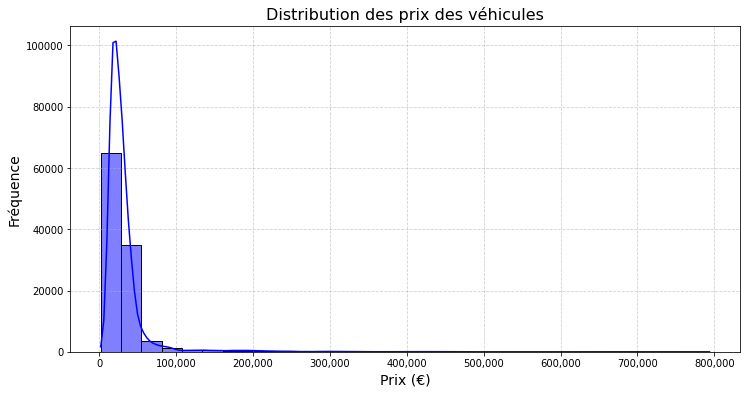

In [582]:
import seaborn as sns

import matplotlib.pyplot as plt

# Créer la figure
plt.figure(figsize=(12, 6))

# Tracer la distribution des prix
sns.histplot(df_gen['Prix (€)'], kde=True, color='blue', bins=30)

# Ajouter des titres et des labels
plt.title("Distribution des prix des véhicules", fontsize=16)
plt.xlabel("Prix (€)", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)

# Formatter l'axe des x pour éviter la notation scientifique
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Afficher le graphique
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

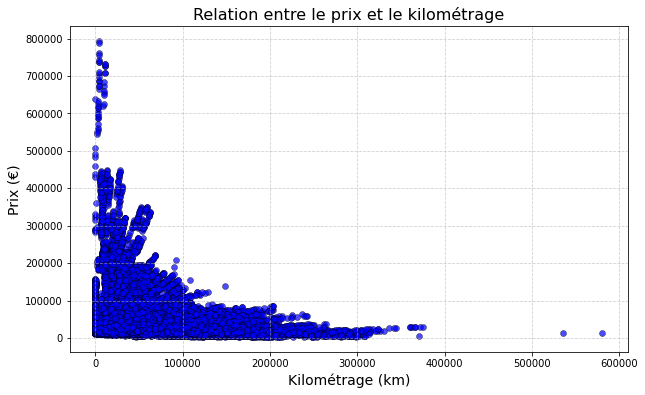

In [583]:
import seaborn as sns

import matplotlib.pyplot as plt

# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer un nuage de points pour visualiser la relation entre le prix et le kilométrage
sns.scatterplot(x=df_gen['Kilometrage'], y=df_gen['Prix (€)'], alpha=0.7, color='blue', edgecolor='black')

# Ajouter les titres et labels
plt.title("Relation entre le prix et le kilométrage", fontsize=16)
plt.xlabel("Kilométrage (km)", fontsize=14)
plt.ylabel("Prix (€)", fontsize=14)

# Ajouter une grille pour faciliter la lecture
plt.grid(True, linestyle='--', alpha=0.6)

# Afficher le graphique
plt.show()

<AxesSubplot:xlabel='puissance_ch', ylabel='Prix (€)'>

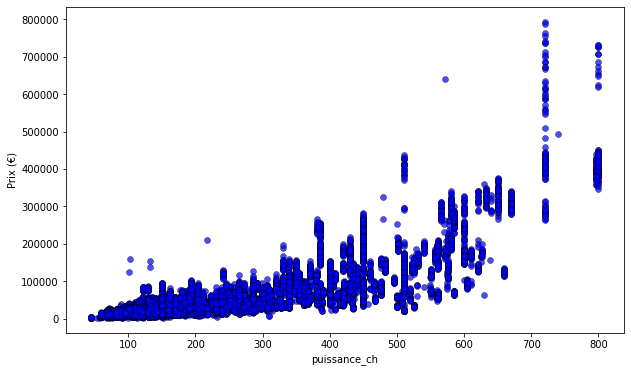

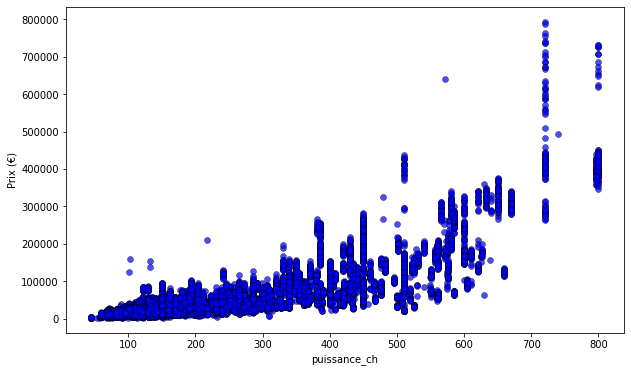

In [585]:
import matplotlib.pyplot as plt

# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer un nuage de points pour visualiser la relation entre le prix et la puissance
sns.scatterplot(x
# Ajouter les titres et labels
=df_gen['puissance_ch'], y=df_gen['Prix (€)'], alpha=0.7, color='blue', edgecolor='black')
# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer un nuage de points pour visualiser la relation entre le prix et la puissance
sns.scatterplot(x=df_gen['puissance_ch'], y=df_gen['Prix (€)'], alpha=0.7, color='blue', edgecolor='black')

C:\Users\dell\AppData\Local\Temp\ipykernel_21036\2178964430.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prix_moyen_par_carburant.index, y=prix_moyen_par_carburant.values, palette="viridis")


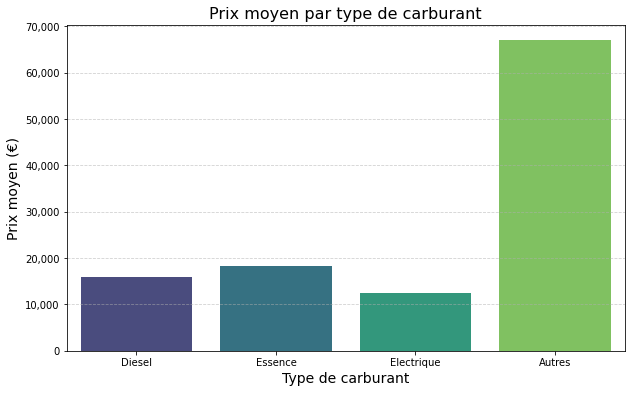

In [587]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculer le prix moyen par type de carburant
prix_moyen_par_carburant = df_hierarchique.groupby('Carburant')['Prix (€)'].mean()

# Ajouter une légende pour comprendre les valeurs de la colonne 'Carburant'
carburant_labels = {0: 'Diesel', 1: 'Essence', 2: 'Electrique', 3: 'Autres'}
prix_moyen_par_carburant.index = prix_moyen_par_carburant.index.map(carburant_labels)
plt.figure(figsize=(10, 6))
sns.barplot(x=prix_moyen_par_carburant.index, y=prix_moyen_par_carburant.values, palette="viridis")

# Ajouter des titres et des labels
plt.title("Prix moyen par type de carburant", fontsize=16)
plt.xlabel("Type de carburant", fontsize=14)
plt.ylabel("Prix moyen (€)", fontsize=14)

# Formatter l'axe des y pour éviter la notation scientifique
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Afficher le graphique
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

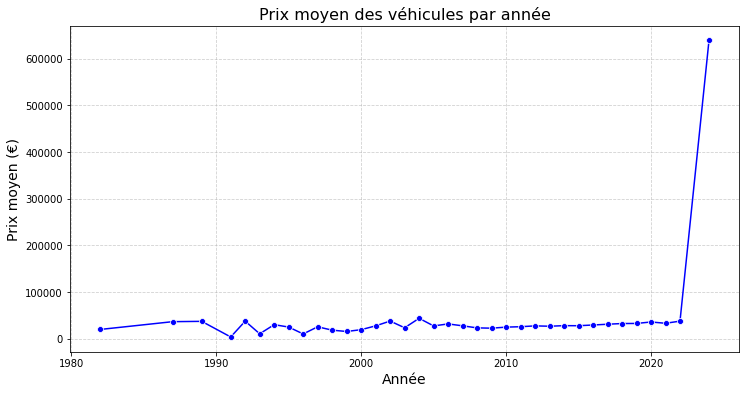

In [588]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculer le prix moyen par année
prix_par_annee = df_gen.groupby('Annee')['Prix (€)'].mean()

# Créer la figure
plt.figure(figsize=(12, 6))

# Tracer le graphique
sns.lineplot(x=prix_par_annee.index, y=prix_par_annee.values, marker='o', color='blue')

# Ajouter des titres et des labels
plt.title("Prix moyen des véhicules par année", fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Prix moyen (€)", fontsize=14)

# Ajouter une grille pour faciliter la lecture
plt.grid(True, linestyle='--', alpha=0.6)

# Afficher le graphique
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_21036\2802928812.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prix_moyen_par_portes.index, y=prix_moyen_par_portes.values, palette="viridis")


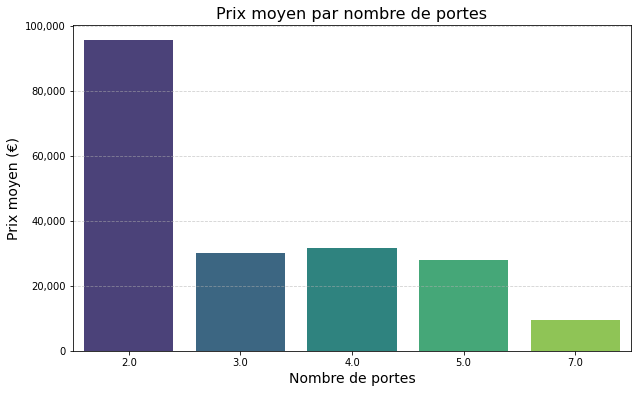

In [589]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculer le prix moyen par nombre de portes
prix_moyen_par_portes = df_gen.groupby('Portes')['Prix (€)'].mean()

# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer un graphique en barres
sns.barplot(x=prix_moyen_par_portes.index, y=prix_moyen_par_portes.values, palette="viridis")

# Ajouter des titres et des labels
plt.title("Prix moyen par nombre de portes", fontsize=16)
plt.xlabel("Nombre de portes", fontsize=14)
plt.ylabel("Prix moyen (€)", fontsize=14)

# Formatter l'axe des y pour éviter la notation scientifique
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Afficher le graphique
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

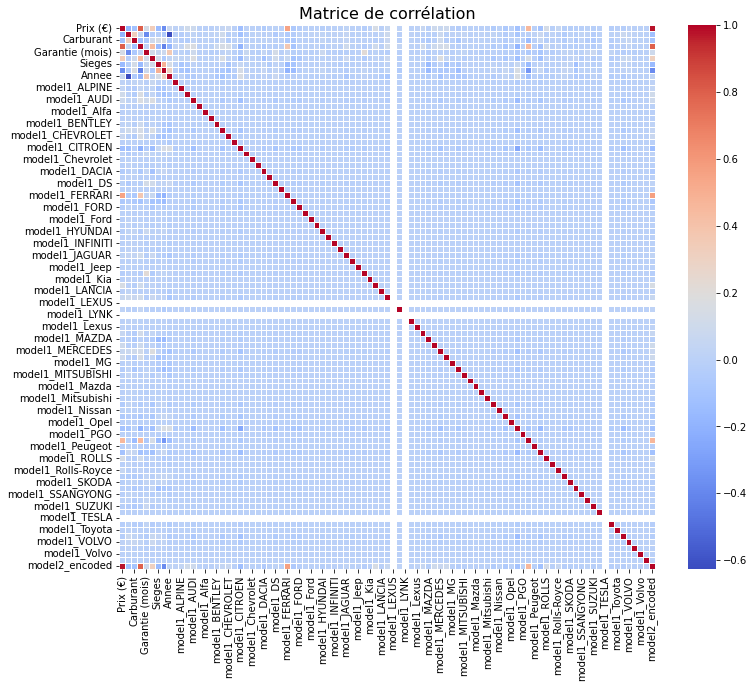

In [591]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculer la matrice de corrélation en excluant les colonnes non numériques
correlation_matrix = df_gen.select_dtypes(include=['number']).corr()

# Créer une figure pour le heatmap
plt.figure(figsize=(12, 10))

# Tracer le heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Ajouter un titre
plt.title("Matrice de corrélation", fontsize=16)

# Afficher le graphique
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_21036\3007719611.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.index.str.replace('model1_', ''), y=top_models.values, palette="viridis")


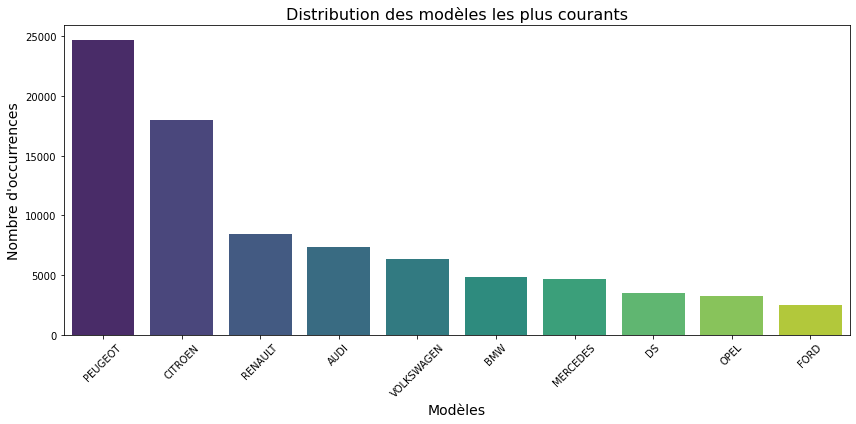

In [592]:
import seaborn as sns

import matplotlib.pyplot as plt

# Compter les occurrences des modèles principaux
model_counts = df_gen.filter(like='model1_').sum().sort_values(ascending=False)

# Sélectionner les 10 modèles les plus courants
top_models = model_counts.head(10)

# Créer un graphique en barres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_models.index.str.replace('model1_', ''), y=top_models.values, palette="viridis")

# Ajouter des titres et des labels
plt.title("Distribution des modèles les plus courants", fontsize=16)
plt.xlabel("Modèles", fontsize=14)
plt.ylabel("Nombre d'occurrences", fontsize=14)

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_21036\4009789603.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prix_par_garantie.index, y=prix_par_garantie.values, palette="viridis")


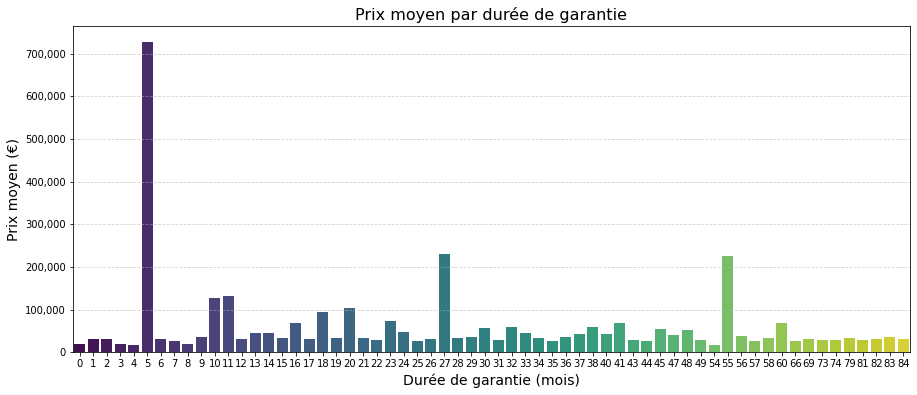

In [594]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculer le prix moyen par garantie
prix_par_garantie = df_gen.groupby('Garantie (mois)')['Prix (€)'].mean()

# Créer la figure
plt.figure(figsize=(15, 6))

# Tracer un graphique en barres
sns.barplot(x=prix_par_garantie.index, y=prix_par_garantie.values, palette="viridis")

# Ajouter des titres et des labels
plt.title("Prix moyen par durée de garantie", fontsize=16)
plt.xlabel("Durée de garantie (mois)", fontsize=14)
plt.ylabel("Prix moyen (€)", fontsize=14)

# Formatter l'axe des y pour éviter la notation scientifique
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Afficher le graphique
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
data_fraame = data_fraame[data_fraame['Prix (€)'] <= 1000000]
data_fraame.head()

,Modèle,Prix (€),Carrosserie,Etat,Sieges,Portes,Kilometrage,Annee,Transmission,Carburant,Marque_Principale,Marque_Secondaire,puissance_kw,puissance_ch,Garantie (mois),price_segment_cluster
1,PureTech 110ch S&S BVM6 Allure Pack 1 ere main...,6990,2,0,5.0,5.0,115000,2018,1.0,1,Peugeot,308,81.0,110.0,0,1
2,250 BLUETEC SPORT 7G-TRONIC +,17900,3,0,5.0,5.0,140480,2014,2.0,0,Mercedes-Benz,ML 250,152.0,207.0,12,3
3,Corsa 1.4 90 ch Edition,5990,4,0,5.0,5.0,65525,2015,3.0,1,Opel,Corsa,66.0,90.0,0,6
4,1.5 DCI - 8V TURBO,4990,5,0,2.0,5.0,168000,2015,1.0,0,Renault,Clio,49.0,67.0,12,4
5,1.0 68CH ACENTA,2990,4,0,4.0,5.0,112241,2010,1.0,1,Nissan,Pixo,77.0,133.0,3,7


In [ ]:
# Fill NaN values with 0 before converting to integers
data_fraame_encoded = data_fraame_encoded.fillna(0).astype(int)
data_fraame_encoded.head()


,Prix (€),Carrosserie,Etat,Sieges,Portes,Kilometrage,Annee,Transmission,Carburant,puissance_kw,...,Marque_Secondaire_X5,Marque_Secondaire_X6,Marque_Secondaire_XC40,Marque_Secondaire_XC60,Marque_Secondaire_XF,Marque_Secondaire_Xsara Picasso,Marque_Secondaire_Yaris,Marque_Secondaire_forTwo,Marque_Secondaire_i30,Marque_Secondaire_up!
1,6990,2,0,5,5,115000,2018,1,1,81,...,0,0,0,0,0,0,0,0,0,0
2,17900,3,0,5,5,140480,2014,2,0,152,...,0,0,0,0,0,0,0,0,0,0
3,5990,4,0,5,5,65525,2015,3,1,66,...,0,0,0,0,0,0,0,0,0,0
4,4990,5,0,2,5,168000,2015,1,0,49,...,0,0,0,0,0,0,0,0,0,0
5,2990,4,0,4,5,112241,2010,1,1,77,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# # Colonnes numériques à standardiser
# numerical_features = ['Kilometrage', 'Annee', 'puissance_ch', 'Garantie (mois)', 
#                       'prix_moyen_marque', 'prix_moyen_serie', 'kilometrage_moyen_marque', 
#                       'age_vehicule', 'km_annuel_moyen', 'valeur_relative_marque']

# # Initialiser le scaler
# scaler = StandardScaler()

# # Appliquer la standardisation
# df_gen_scaled = df_gen.copy()
# df_gen_scaled[numerical_features] = scaler.fit_transform(df_gen[numerical_features])

# # Afficher les premières lignes pour vérifier
# df_gen_scaled.head()

In [ ]:
data_fraame_encoded.to_csv('cleaned_data.csv', index=False)

# entrainement du modele

## xgboost

In [596]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

In [597]:

# Définir la variable cible (prix) et les caractéristiques
y = df_gen['Prix (€)']

In [ ]:
# Sélectionner les colonnes à utiliser comme entrées basées sur notre discussion précédente
features = [
    # Caractéristiques brutes
    'Carrosserie', 'Etat', 'Sieges', 'Portes', 'Kilometrage', 'Annee', 
    'Transmission', 'Carburant', 'puissance_kw', 'puissance_ch', 'Garantie (mois)',
    
    # Variables hiérarchiques encodées
    'marque_encoded', 'serie_encoded', 'body_category_encoded', 'price_category_encoded',
    
    # Variables statistiques et composites
    'prix_moyen_marque', 'prix_moyen_serie', 'kilometrage_moyen_marque', 
    'age_vehicule', 'km_annuel_moyen', 'valeur_relative_marque'
]

# Filtrer le DataFrame pour ne garder que les colonnes dont nous avons besoin
X = df_hierarchique[features]
X.dtypes


Carrosserie                   int32
Etat                          int32
Sieges                        int32
Portes                        int32
Kilometrage                   int32
Annee                         int32
Transmission                  int32
Carburant                     int32
puissance_kw                  int32
puissance_ch                  int32
Garantie (mois)               int32
marque_encoded                int32
serie_encoded                 int32
body_category_encoded         int32
price_category_encoded        int32
prix_moyen_marque           float64
prix_moyen_serie            float64
kilometrage_moyen_marque    float64
age_vehicule                  int32
km_annuel_moyen             float64
valeur_relative_marque      float64
dtype: object

In [ ]:
# Diviser les données en ensembles d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Standardisation des variables numériques
# (Cette étape est facultative pour les arbres de décision mais peut être utile pour XGBoost)
scaler = StandardScaler()
numerical_features = ['Kilometrage', 'Annee', 'puissance_kw', 'puissance_ch', 
                      'prix_moyen_marque', 'prix_moyen_serie', 'kilometrage_moyen_marque', 
                      'age_vehicule', 'km_annuel_moyen']

In [ ]:
# Créer une copie pour éviter les avertissements SettingWithCopyWarning
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Appliquer le scaling uniquement aux variables numériques
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

X_train_scaled[['Kilometrage', 'Annee', 'puissance_kw', 'puissance_ch', 
                      'prix_moyen_marque', 'prix_moyen_serie', 'kilometrage_moyen_marque', 
                      'age_vehicule', 'km_annuel_moyen']].head()

,Kilometrage,Annee,puissance_kw,puissance_ch,prix_moyen_marque,prix_moyen_serie,kilometrage_moyen_marque,age_vehicule,km_annuel_moyen
7,1.339768,-1.527249,-0.154928,-0.131245,-0.175675,-0.275978,0.094835,1.527249,-0.297028
375,0.515463,-1.092498,1.049202,1.118177,-0.073215,-0.154961,-0.038645,1.092498,-0.547839
395,-0.819125,0.863879,-0.375685,-0.362620,0.956352,0.296696,1.014497,-0.863879,-0.073901
477,-1.300933,0.646504,-0.375685,-0.362620,2.362293,-0.067903,-1.240077,-0.646504,-1.021793
120,0.721004,-0.005622,1.731541,1.827726,0.956352,0.966740,1.014497,0.005622,0.488646


In [ ]:

# Initialiser le modèle   régression XGBoost (Extreme Gradient Boosting)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)


In [ ]:

# Paramètres à tester pour l'optimisation
xgb_param_grid = {
    'n_estimators': [100, 200, 300], #n_estimators (Nombre d'arbres)
    'learning_rate': [0.01, 0.05, 0.1], #learning_rate (Taux d'apprentissage)
    'max_depth': [3, 5, 7],#max_depth (Profondeur maximale de l'arbre)
    'min_child_weight': [1, 3, 5],#min_child_weight (Poids minimum des enfants)
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}


In [ ]:

# Recherche par grille avec validation croisée
# Note: Cette opération peut prendre du temps, vous pouvez réduire le nombre de paramètres à tester
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, 
                              cv=5, scoring='neg_mean_squared_error', 
                              verbose=1, n_jobs=-1)

# Entraîner le modèle avec recherche des meilleurs hyperparamètres
xgb_grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:

# Meilleurs paramètres trouvés
print("\nMeilleurs paramètres pour XGBoost:")
print(xgb_grid_search.best_params_)




Meilleurs paramètres pour XGBoost:
{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.7}


In [ ]:
# Utiliser le meilleur modèle
best_xgb_model = xgb_grid_search.best_estimator_



In [ ]:
# Prédictions
xgb_y_pred = best_xgb_model.predict(X_test_scaled)



In [ ]:
# Évaluation du modèle XGBoost
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("\nÉvaluation du modèle XGBoost:")
print(f"MSE: {xgb_mse:.2f}")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"MAE: {xgb_mae:.2f}")
print(f"R² Score: {xgb_r2:.4f}")



Évaluation du modèle XGBoost:
MSE: 6678659357.99
RMSE: 81723.07
MAE: 14207.45
R² Score: 0.0860


 XGBoost présente un RMSE et un MAE relativement élevés, et surtout un R² très faible. Cela suggère que le modèle ne parvient pas à capturer suffisamment l'information présente dans vos données pour faire des prédictions précises

In [ ]:

# Caractéristiques importantes pour XGBoost
xgb_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportance des caractéristiques (XGBoost):")
print(xgb_feature_importance.head(10))


Importance des caractéristiques (XGBoost):
                   Feature  Importance
20  valeur_relative_marque    0.653673
14  price_category_encoded    0.284225
16        prix_moyen_serie    0.015287
15       prix_moyen_marque    0.010591
3                   Portes    0.010470
18            age_vehicule    0.006217
7                Carburant    0.004955
5                    Annee    0.002888
8             puissance_kw    0.002098
6             Transmission    0.001437


## 2.Modèle d'Arbre de Décision

In [ ]:
# Initialiser le modèle
dt_model = DecisionTreeRegressor(random_state=42)


In [ ]:
# Paramètres à tester pour l'optimisation
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


In [ ]:


# Recherche par grille avec validation croisée
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, 
                            cv=5, scoring='neg_mean_squared_error', 
                            verbose=1, n_jobs=-1)

# Entraîner le modèle avec recherche des meilleurs hyperparamètres
dt_grid_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres pour l'arbre de décision:")
print(dt_grid_search.best_params_)

# Utiliser le meilleur modèle
best_dt_model = dt_grid_search.best_estimator_

# Prédictions
dt_y_pred = best_dt_model.predict(X_test_scaled)

# Évaluation du modèle d'arbre de décision
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print("\nÉvaluation du modèle d'arbre de décision:")
print(f"MSE: {dt_mse:.2f}")
print(f"RMSE: {dt_rmse:.2f}")
print(f"MAE: {dt_mae:.2f}")
print(f"R² Score: {dt_r2:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs paramètres pour l'arbre de décision:
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Évaluation du modèle d'arbre de décision:
MSE: 6545375588.67
RMSE: 80903.50
MAE: 14160.40
R² Score: 0.1042


In [ ]:

# Caractéristiques importantes pour l'arbre de décision
dt_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportance des caractéristiques (Arbre de décision):")
print(dt_feature_importance.head(10))



Importance des caractéristiques (Arbre de décision):
                   Feature  Importance
20  valeur_relative_marque    0.869299
14  price_category_encoded    0.102909
16        prix_moyen_serie    0.016596
4              Kilometrage    0.002596
10         Garantie (mois)    0.002321
5                    Annee    0.001997
8             puissance_kw    0.001492
19         km_annuel_moyen    0.000695
15       prix_moyen_marque    0.000487
0              Carrosserie    0.000437


In [ ]:
# 4. Comparaison des modèles
# -------------------------

# Créer un DataFrame pour comparer les prédictions
comparison_df = pd.DataFrame({
    'Prix réel': y_test,
    'Prédiction Arbre de Décision': dt_y_pred,
    'Prédiction XGBoost': xgb_y_pred,
    'Erreur Arbre de Décision': y_test - dt_y_pred,
    'Erreur XGBoost': y_test - xgb_y_pred
})

# Calculer l'erreur relative en pourcentage
comparison_df['Erreur relative Arbre (%)'] = (comparison_df['Erreur Arbre de Décision'] / comparison_df['Prix réel']) * 100
comparison_df['Erreur relative XGBoost (%)'] = (comparison_df['Erreur XGBoost'] / comparison_df['Prix réel']) * 100

# Afficher les premières lignes du DataFrame de comparaison
print("\nComparaison des prédictions:")
print(comparison_df.head())



Comparaison des prédictions:
     Prix réel  Prédiction Arbre de Décision  Prédiction XGBoost  \
139      11490                       10990.0        12348.667969   
473      11900                       12890.0        12228.784180   
74        9900                        8990.0         7425.156738   
306       7990                        7990.0         8164.438477   
233      10990                       10890.0        11290.114258   

     Erreur Arbre de Décision  Erreur XGBoost  Erreur relative Arbre (%)  \
139                     500.0     -858.667969                   4.351610   
473                    -990.0     -328.784180                  -8.319328   
74                      910.0     2474.843262                   9.191919   
306                       0.0     -174.438477                   0.000000   
233                     100.0     -300.114258                   0.909918   

     Erreur relative XGBoost (%)  
139                    -7.473176  
473                    -2.762892  

In [ ]:






# Résumé des erreurs relatives
print("\nRésumé des erreurs relatives (%):")
print(comparison_df[['Erreur relative Arbre (%)', 'Erreur relative XGBoost (%)']].describe())



Résumé des erreurs relatives (%):
       Erreur relative Arbre (%)  Erreur relative XGBoost (%)
count                  58.000000                    58.000000
mean                    3.722443                     3.002654
std                    22.767971                    20.798853
min                   -66.889632                   -35.534423
25%                    -7.016905                    -5.865602
50%                     0.000000                     1.370055
75%                     9.037782                     9.009332
max                    92.660407                    93.616947


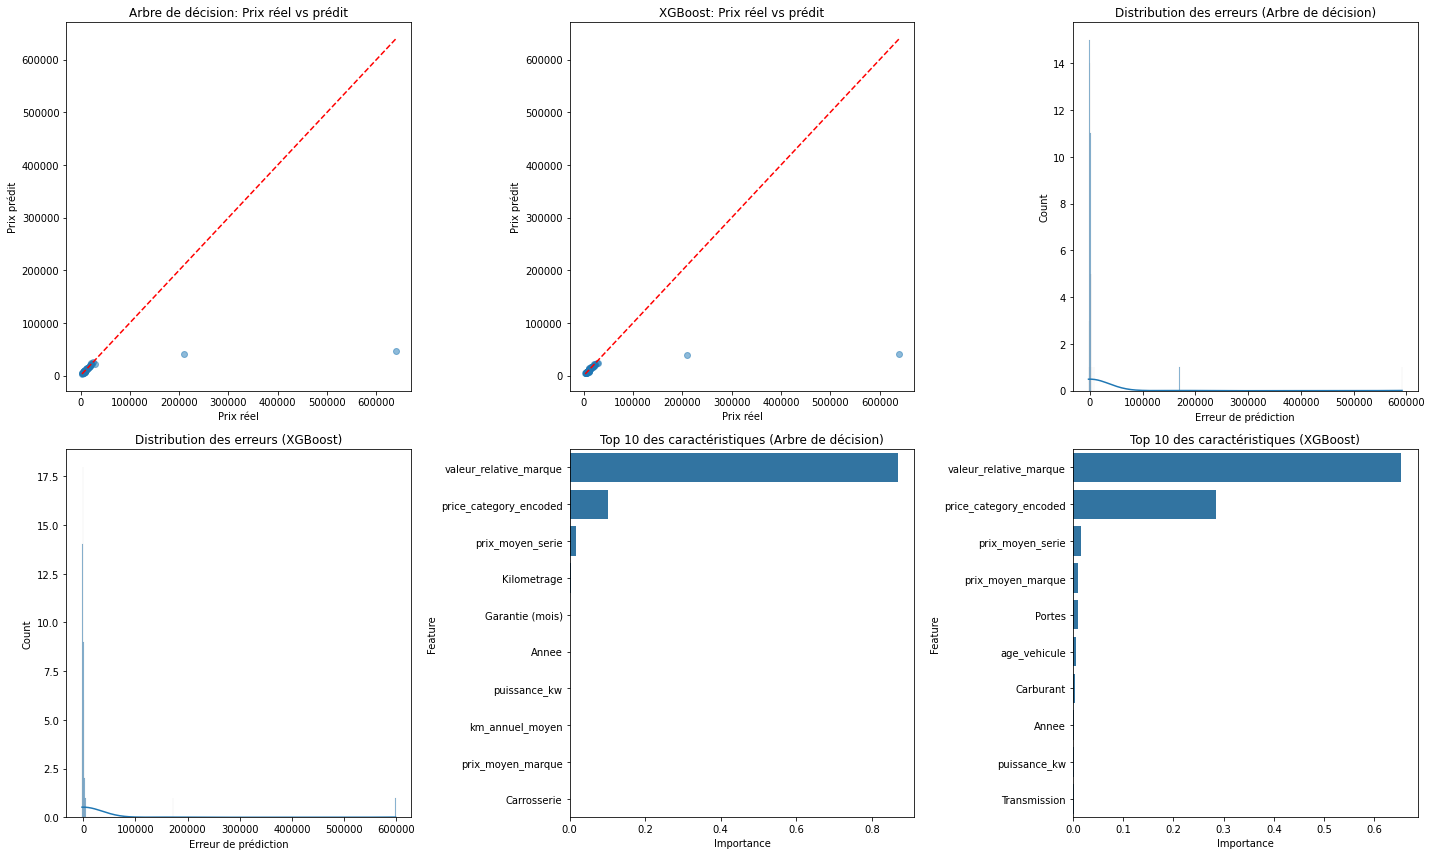

In [ ]:

# 5. Visualisation des résultats
# ----------------------------
from matplotlib import pyplot as plt
# Créer une figure avec plusieurs sous-graphiques
plt.figure(figsize=(20, 12))

# 1. Comparaison des prix réels vs prédits (Arbre de décision)
plt.subplot(2, 3, 1)
if 'y_test' in locals() and 'dt_y_pred' in locals():
	plt.scatter(y_test, dt_y_pred, alpha=0.5)
	plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
	plt.xlabel('Prix réel')
	plt.ylabel('Prix prédit')
	plt.title('Arbre de décision: Prix réel vs prédit')
else:
	print("Error: 'y_test' or 'dt_y_pred' is not defined. Please ensure the necessary cells are executed.")

# 2. Comparaison des prix réels vs prédits (XGBoost)
plt.subplot(2, 3, 2)
plt.scatter(y_test, xgb_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Prix réel')
plt.ylabel('Prix prédit')
plt.title('XGBoost: Prix réel vs prédit')

# 3. Distribution des erreurs (Arbre de décision)
plt.subplot(2, 3, 3)
sns.histplot(comparison_df['Erreur Arbre de Décision'], kde=True)
plt.xlabel('Erreur de prédiction')
plt.title('Distribution des erreurs (Arbre de décision)')

# 4. Distribution des erreurs (XGBoost)
plt.subplot(2, 3, 4)
sns.histplot(comparison_df['Erreur XGBoost'], kde=True)
plt.xlabel('Erreur de prédiction')
plt.title('Distribution des erreurs (XGBoost)')

# 5. Top 10 des caractéristiques importantes (Arbre de décision)
plt.subplot(2, 3, 5)
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance.head(10))
plt.title('Top 10 des caractéristiques (Arbre de décision)')

# 6. Top 10 des caractéristiques importantes (XGBoost)
plt.subplot(2, 3, 6)
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance.head(10))
plt.title('Top 10 des caractéristiques (XGBoost)')

plt.tight_layout()
plt.savefig('comparaison_modeles.png')
plt.show()


In [ ]:

# 6. Sauvegarder les modèles pour une utilisation future
# ----------------------------------------------------

import joblib

# Sauvegarder les modèles
joblib.dump(best_dt_model, 'decision_tree_model.pkl')
joblib.dump(best_xgb_model, 'xgboost_model.pkl')

# Sauvegarder le scaler pour standardiser les futures données
joblib.dump(scaler, 'scaler.pkl')

print("\nLes modèles ont été sauvegardés avec succès!")



Les modèles ont été sauvegardés avec succès!


In [ ]:

# 7. Fonction pour prédire le prix d'un nouveau véhicule
# ----------------------------------------------------

def predict_vehicle_price(model, new_vehicle_data, scaler=None, numerical_features=None):
    """
    Prédit le prix d'un nouveau véhicule en utilisant le modèle entraîné.
    
    Args:
        model: Le modèle entraîné (Arbre de décision ou XGBoost)
        new_vehicle_data: DataFrame avec les caractéristiques du nouveau véhicule
        scaler: Objet StandardScaler utilisé pour normaliser les données
        numerical_features: Liste des colonnes numériques à normaliser
        
    Returns:
        Le prix prédit pour le véhicule
    """
    # Si un scaler est fourni, appliquer la standardisation aux caractéristiques numériques
    if scaler is not None and numerical_features is not None:
        new_vehicle_data_scaled = new_vehicle_data.copy()
        new_vehicle_data_scaled[numerical_features] = scaler.transform(new_vehicle_data[numerical_features])
        return model.predict(new_vehicle_data_scaled)[0]
    else:
        return model.predict(new_vehicle_data)[0]

# Exemple d'utilisation avec un nouveau véhicule
print("\nExemple de prédiction pour un nouveau véhicule:")

# Créer un DataFrame pour un nouveau véhicule (avec les mêmes colonnes que celles utilisées pour l'entraînement)
# Remarque: Remplacez ces valeurs par celles d'un véhicule réel
new_vehicle = pd.DataFrame({
    'Carrosserie': [1],
    'Etat': [2],
    'Sieges': [5],
    'Portes': [5],
    'Kilometrage': [800000],
    'Annee': [2009],
    'Transmission': [1],  # 0 pour manuelle, 1 pour automatique par exemple
    'Carburant': [2],     # 0 pour essence, 1 pour diesel, 2 pour hybride par exemple
    'puissance_kw': [110],
    'puissance_ch': [150],
    'Garantie (mois)': [6],
    'marque_encoded': [5],  # Dépend de votre encodage
    'serie_encoded': [12],  # Dépend de votre encodage
    'body_category_encoded': [2],  # 1 pour SUV par exemple
    'price_category_encoded': [2],  # 2 pour Mid-range par exemple
    'prix_moyen_marque': [25000],
    'prix_moyen_serie': [22000],
    'kilometrage_moyen_marque': [900000],
    'age_vehicule': [17],
    'km_annuel_moyen': [114298.57],  # 80000/7
    'valeur_relative_marque': [0.9]  # Le véhicule vaut 90% du prix moyen de sa marque
})

# Prédire le prix avec les deux modèles
predicted_price_dt = predict_vehicle_price(best_dt_model, new_vehicle, scaler, numerical_features)
predicted_price_xgb = predict_vehicle_price(best_xgb_model, new_vehicle, scaler, numerical_features)

print(f"Prix prédit par l'arbre de décision: {predicted_price_dt:.2f} €")
print(f"Prix prédit par XGBoost: {predicted_price_xgb:.2f} €")
print(f"Prix moyen prédit: {(predicted_price_dt + predicted_price_xgb) / 2:.2f} €")


Exemple de prédiction pour un nouveau véhicule:
Prix prédit par l'arbre de décision: 24990.00 €
Prix prédit par XGBoost: 23417.98 €
Prix moyen prédit: 24203.99 €
